In [1]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Coffee Shop Sales.csv")
df.head()


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01-01-2023,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01-01-2023,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01-01-2023,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01-01-2023,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01-01-2023,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:
# checking for nulls
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [5]:
# dropping "product_id" and "store_id"
df.drop(columns = ["store_id", "product_id"], inplace = True)

In [6]:
# rename columns
df.rename(columns = {'transaction_id': 'id',
                     'transaction_date': 'date',
                     'transaction_time': 'time',
                     'transaction_qty': 'quantity',
                     'store_location': 'location',
                     'product_category': 'category',
                     'product_type': 'product',
                     'product_detail': 'detail'}, inplace = True)

In [7]:
# check duplicated rows
df.duplicated().any()

np.False_

In [8]:
# Find duplicated rows based on the 'id' column
duplicates = df[df.duplicated(subset='id', keep=False)]
duplicates

,id,date,time,quantity,location,unit_price,category,product,detail


In [9]:
# summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          149116 non-null  int64  
 1   date        149116 non-null  object 
 2   time        149116 non-null  object 
 3   quantity    149116 non-null  int64  
 4   location    149116 non-null  object 
 5   unit_price  149116 non-null  float64
 6   category    149116 non-null  object 
 7   product     149116 non-null  object 
 8   detail      149116 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 10.2+ MB


In [10]:
# converting date to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [11]:
# sales
df['sales'] = df['quantity'] * df['unit_price']

In [12]:
# extract the month as a full name
df['month'] = df['date'].dt.strftime('%B')

In [13]:
# extract the day and year
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year

In [14]:
# get the weekday name
df['weekday'] = df['date'].dt.day_name()

In [15]:
# extracting the hour from time
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

In [16]:
# defining the time of the day
def get_time_of_day(hour):
    if hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

In [17]:
df['time_of_day'] = df['hour'].apply(get_time_of_day)

In [18]:
df.head()

,id,date,time,quantity,location,unit_price,category,product,detail,sales,month,day,year,weekday,hour,time_of_day
0,1,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,January,1,2023,Sunday,7,Morning
1,2,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning
2,3,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,January,1,2023,Sunday,7,Morning
3,4,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,January,1,2023,Sunday,7,Morning
4,5,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning


In [19]:
df.to_csv('cleaned_coffee_sales_dataset.csv')

## EDA & Metrics

In [20]:
palette = sns.set_palette(sns.color_palette("RdBu"))

### 0.1 Total Revenue

In [21]:
total_revenue = df['sales'].sum()
(f'Total Revenue: ${total_revenue:,.2f}')

'Total Revenue: $698,812.33'

### 0.2 Total Orders

In [22]:
total_orders = df['id'].nunique()
(f'Total Order: {total_orders:,.2f}')

'Total Order: 149,116.00'

### 0.3 Average Order Value (AOV)

In [23]:
aov = total_revenue/total_orders
(f'Average Order Value (AOV): {aov:,.2f}')

'Average Order Value (AOV): 4.69'

### 0.4 Peak Sales Location & Revenue

In [24]:
peak_sales_location = df.groupby('location')['sales'].sum().idxmax()
(f'Peak Sales Location: {peak_sales_location}')

"Peak Sales Location: Hell's Kitchen"

In [25]:
peak_sales_location_revenue = df.groupby('location')['sales'].sum().max()
(f'Peak Sales Location: ${peak_sales_location_revenue:,.2f}')

'Peak Sales Location: $236,511.17'

### 0.5 Sales by Month

In [26]:
# Sum of sales for each month
revenue = df.groupby('month')['sales'].sum().reset_index()
revenue

,month,sales
0,April,118941.08
1,February,76145.19
2,January,81677.74
3,June,166485.88
4,March,98834.68
5,May,156727.76


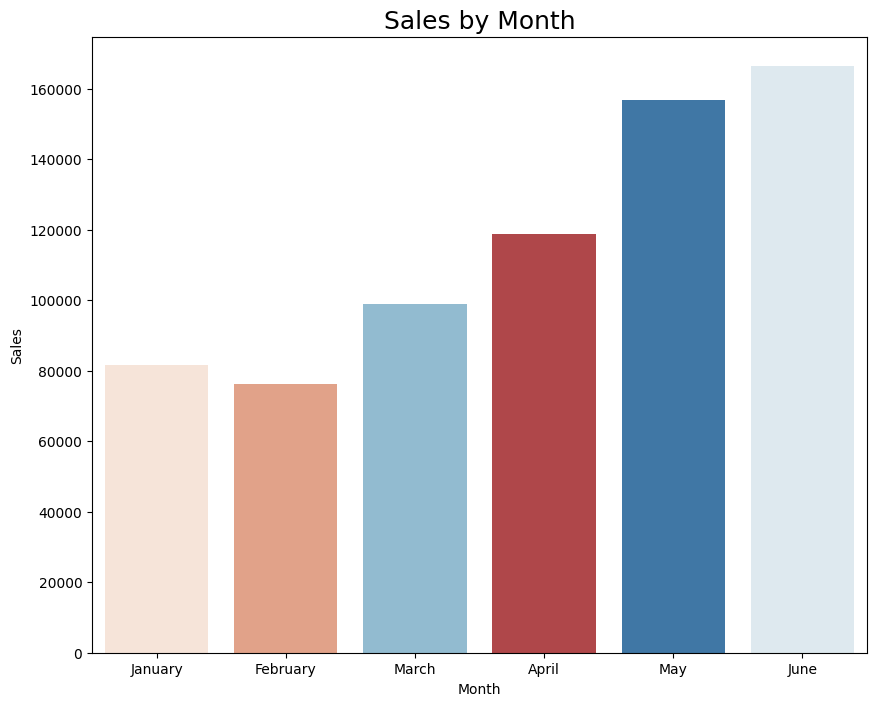

In [27]:
plt.figure(figsize=(10, 8))
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
sns.barplot(data = revenue, x = 'month', y = 'sales', hue = 'month', order = month_order, errorbar = None)
plt.title('Sales by Month', fontsize = 18)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

### 0.6 Sales by Location

In [28]:
# Sum of sales for each location
location_revenue = df.groupby('location')['sales'].sum().reset_index()
location_revenue

,location,sales
0,Astoria,232243.91
1,Hell's Kitchen,236511.17
2,Lower Manhattan,230057.25


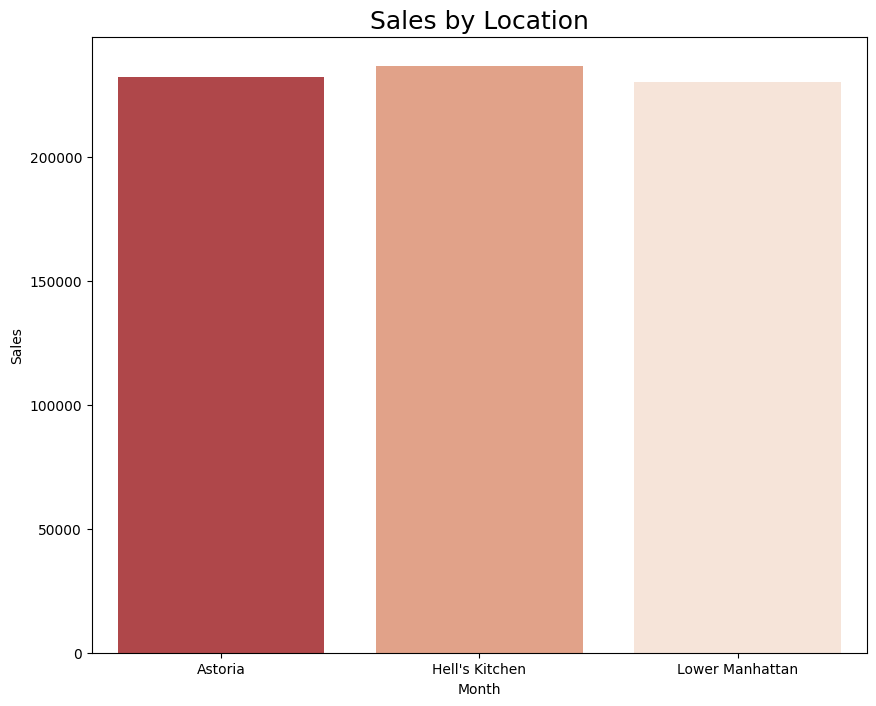

In [29]:
plt.figure(figsize=(10, 8))
sns.barplot(data = location_revenue, x = 'location', y = 'sales', hue = 'location', errorbar = None)
plt.title('Sales by Location', fontsize = 18)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

### 0.7 Top 10 Popular Product by Revenue

In [30]:
product_revenue = df.groupby('product')['sales'].sum().reset_index()
product_revenue

,product,sales
0,Barista Espresso,91406.20
1,Biscotti,19793.53
2,Black tea,2711.85
3,Brewed Black tea,47932.00
4,Brewed Chai tea,77081.95
5,Brewed Green tea,23852.50
6,Brewed herbal tea,47539.50
7,Chai tea,4301.25
8,Clothing,6163.00
9,Drinking Chocolate,2728.04


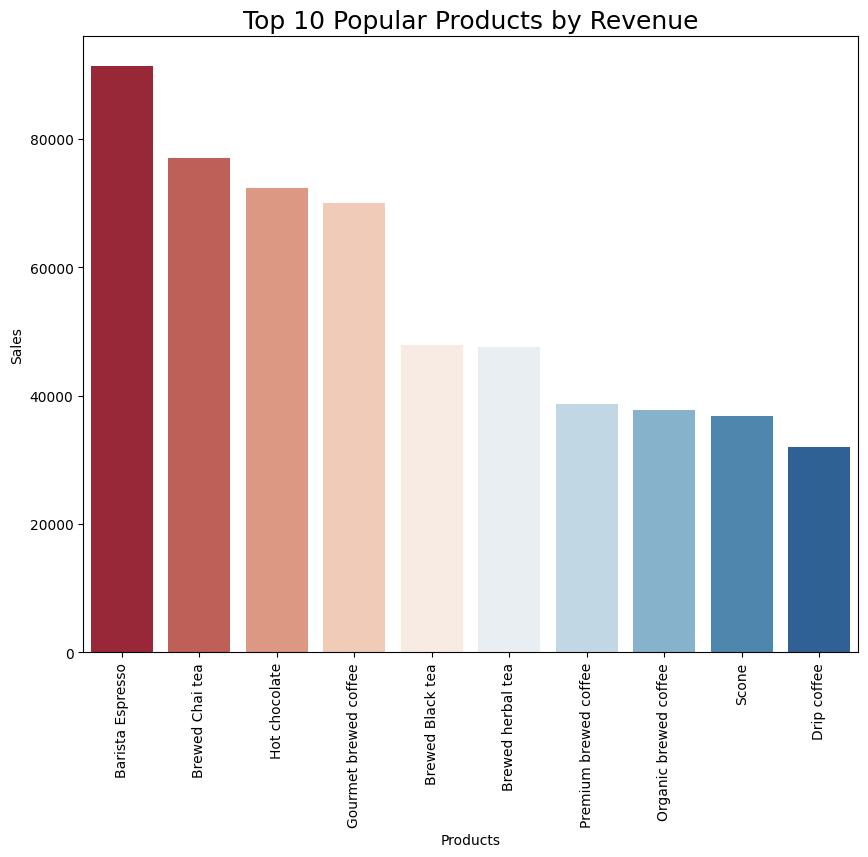

In [31]:
plt.figure(figsize = (10, 8))
ax = sns.barplot(x = 'product', y = 'sales', hue='product', palette='RdBu', data = product_revenue.sort_values('sales', ascending = False)[0:10])
# x-axis rotation
plt.xticks(rotation=90)
plt.title('Top 10 Popular Products by Revenue', fontsize = 18)
plt.xlabel('Products')
plt.ylabel('Sales')
plt.show()

### 0.8 Average Order Value (AOV) by Product Category

In [32]:
category_aov = df.groupby('category')['sales'].mean().reset_index()
category_aov

,category,sales
0,Bakery,3.610969
1,Branded,18.215529
2,Coffee,4.621207
3,Coffee beans,22.866657
4,Drinking Chocolate,6.314615
5,Flavours,1.238409
6,Loose Tea,9.267438
7,Packaged Chocolate,9.050595
8,Tea,4.321458


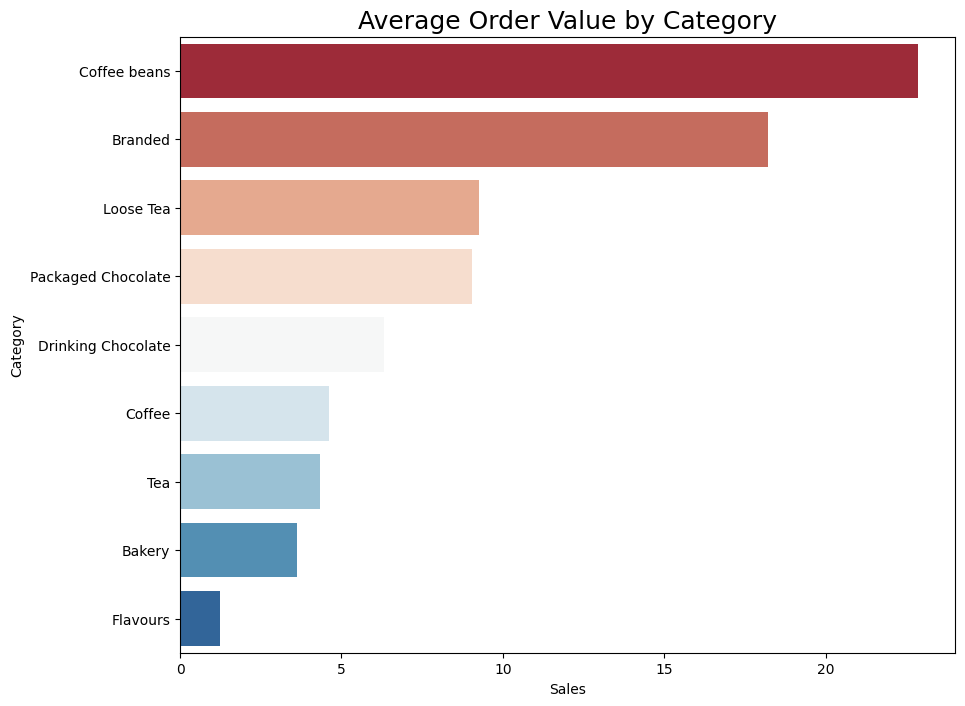

In [33]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'sales', y = 'category', hue = 'category', palette='RdBu', data = category_aov.sort_values('sales', ascending = False))
plt.title('Average Order Value by Category', fontsize = 18)
plt.xlabel('Sales')
plt.ylabel('Category')
plt.show()

### 0.9 Popular Category

In [34]:
# count of category
category_count = df['category'].value_counts().reset_index()
category_count

,category,count
0,Coffee,58416
1,Tea,45449
2,Bakery,22796
3,Drinking Chocolate,11468
4,Flavours,6790
5,Coffee beans,1753
6,Loose Tea,1210
7,Branded,747
8,Packaged Chocolate,487


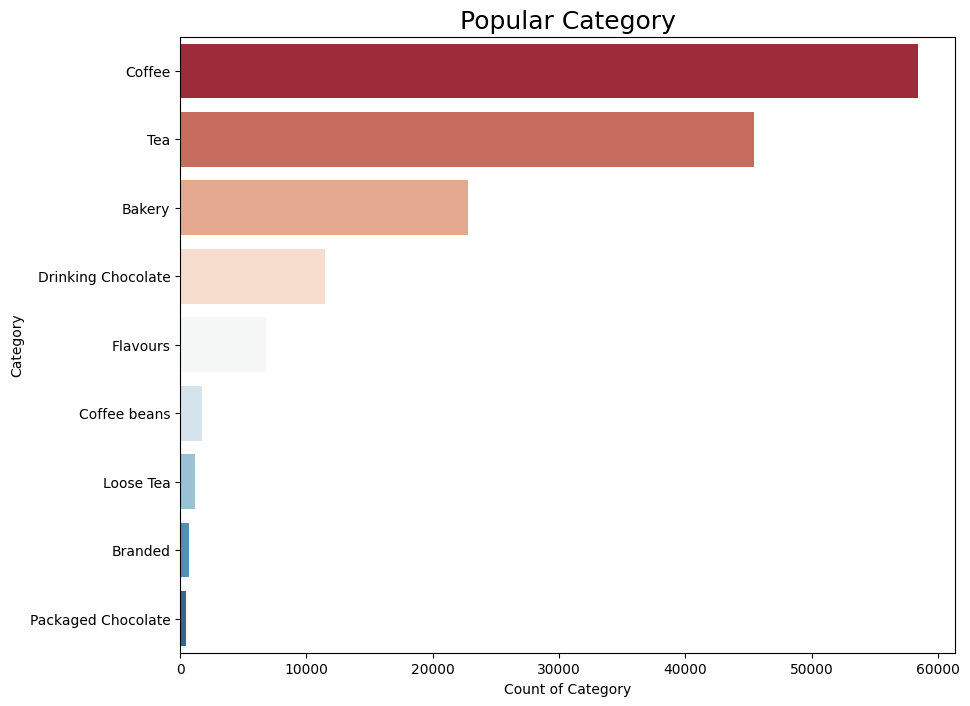

In [35]:
plt.figure(figsize = (10, 8))
sns.barplot(data = category_count, x = 'count', y = 'category', hue = 'category', palette='RdBu')
plt.title('Popular Category', fontsize = 18)
plt.xlabel('Count of Category')
plt.ylabel('Category')
plt.show()

### 0.10 Peak Hour

In [36]:
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
order_per_hour = df.groupby('hour')['id'].count().reset_index()
order_per_hour

,hour,id
0,6,4594
1,7,13428
2,8,17654
3,9,17764
4,10,18545
5,11,9766
6,12,8708
7,13,8714
8,14,8933
9,15,8979


In [37]:
# rename columns
order_per_hour.rename(columns = {'id':'count_of_orders'}, inplace = True)

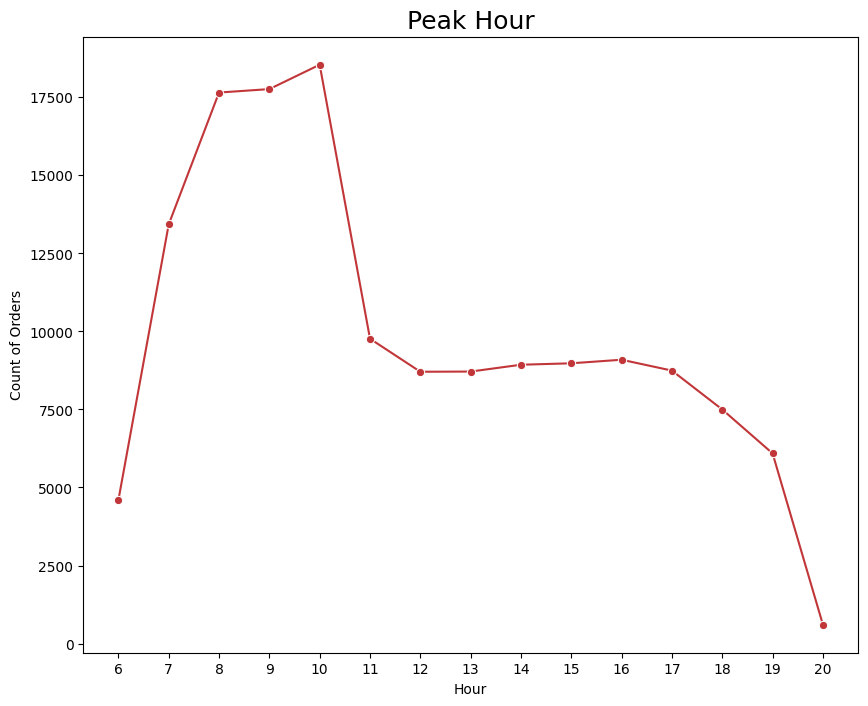

In [38]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'hour', y = 'count_of_orders', data = order_per_hour, marker='o')
plt.xlabel('Hour')
plt.ylabel('Count of Orders')
plt.title('Peak Hour', fontsize = 18)
# Set the x-axis limits to the min and max values of 'hour'
plt.xticks(range(order_per_hour['hour'].min(), order_per_hour['hour'].max() + 1))
plt.show()

### 0.11 Peak Day

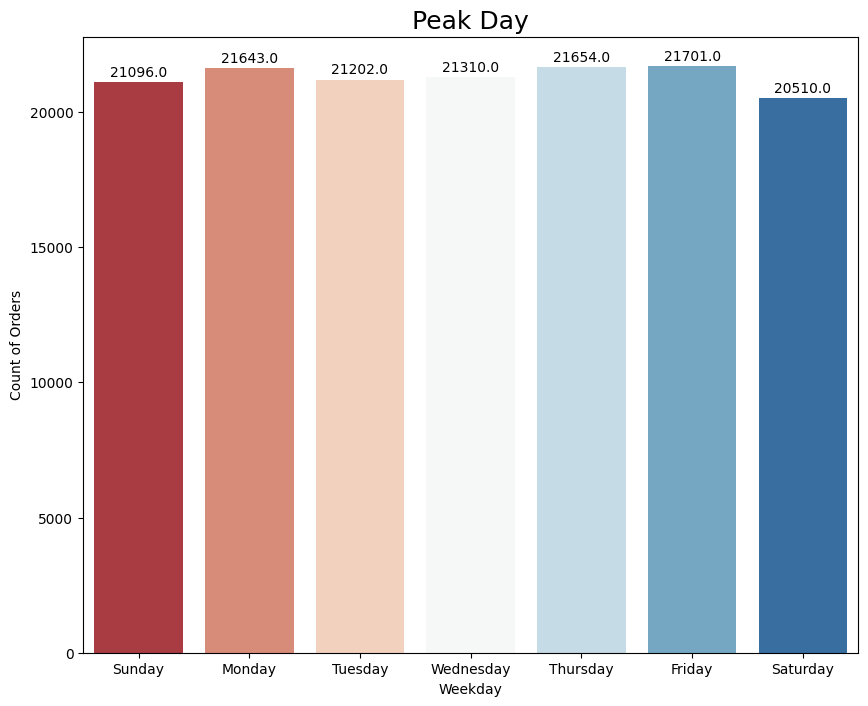

In [39]:
plt.figure(figsize = (10, 8))
weekdays_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax = sns.countplot(x = 'weekday', data = df, hue = 'weekday', palette='RdBu', order = weekdays_order)

# Add count values inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),   # x and y position of the text
                ha = 'center', va = 'center', 
                xytext = (0, 7), textcoords='offset points')  

plt.xlabel('Weekday')
plt.ylabel('Count of Orders')
plt.title('Peak Day', fontsize = 18)
plt.show()

### 0.12 Distribution of orders across different coffee types

In [40]:
coffee_type = df[df['category'] == 'Coffee'][['product']]
coffee_type

,product
0,Gourmet brewed coffee
3,Drip coffee
6,Drip coffee
7,Gourmet brewed coffee
8,Barista Espresso
...,...
149103,Organic brewed coffee
149104,Premium brewed coffee
149105,Drip coffee
149106,Gourmet brewed coffee


In [41]:
coffee_type_count = coffee_type['product'].value_counts().reset_index()
coffee_type_count

,product,count
0,Gourmet brewed coffee,16912
1,Barista Espresso,16403
2,Organic brewed coffee,8489
3,Drip coffee,8477
4,Premium brewed coffee,8135


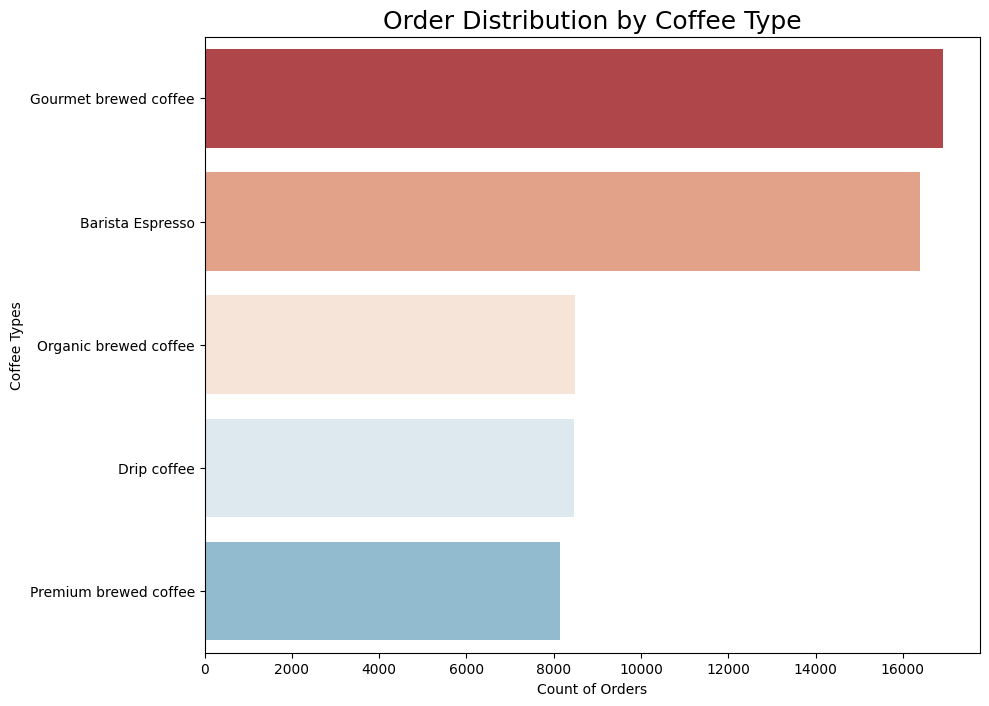

In [42]:
plt.figure(figsize = (10, 8))
sns.barplot(data = coffee_type_count, x = 'count', y = 'product', hue = 'product' )
plt.title('Order Distribution by Coffee Type', fontsize = 18)
plt.xlabel('Count of Orders')
plt.ylabel('Coffee Types')
plt.show()

## Additional Exploratory Data Analysis

In [43]:
# Descriptive statistics for numerical columns
df.describe()
# This provides count, mean, std, min, max, and quartiles for all numerical columns.

,id,date,quantity,unit_price,sales,day,year,hour
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.0,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,3.382219,4.686367,15.622576,2023.0,11.735790
min,1.000000,2023-01-01 00:00:00,1.000000,0.800000,0.800000,1.000000,2023.0,6.000000
25%,37335.750000,2023-03-06 00:00:00,1.000000,2.500000,3.000000,8.000000,2023.0,9.000000
50%,74727.500000,2023-04-24 00:00:00,1.000000,3.000000,3.750000,16.000000,2023.0,11.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,3.750000,6.000000,23.000000,2023.0,15.000000
max,149456.000000,2023-06-30 00:00:00,8.000000,45.000000,360.000000,31.000000,2023.0,20.000000
std,43153.600016,NaN,0.542509,2.658723,4.227099,8.591213,0.0,3.764662


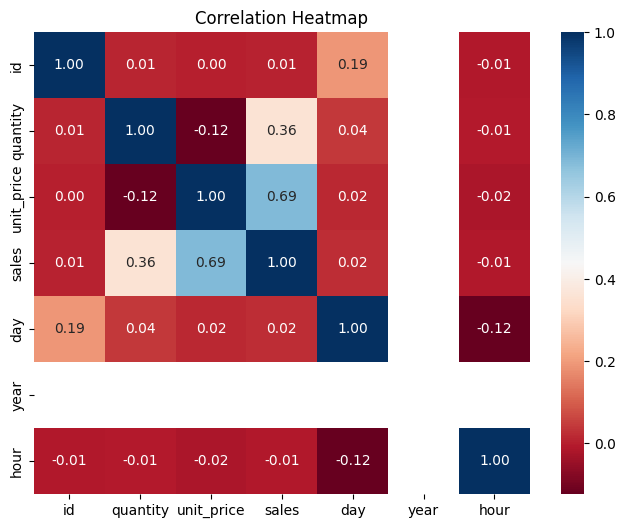

In [44]:
# Correlation heatmap to show relationships between numerical features
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='RdBu', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
# This heatmap helps identify strong positive or negative relationships between numerical variables.

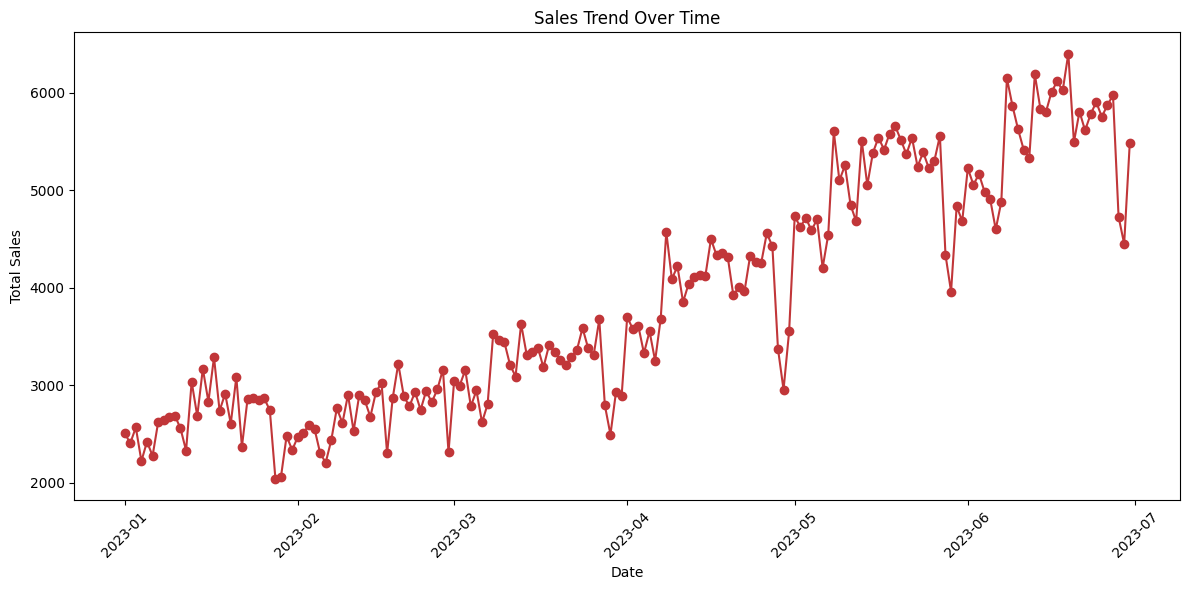

In [45]:
# Sales trend over time (line plot by date)
daily_sales = df.groupby('date')['sales'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(daily_sales['date'], daily_sales['sales'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# This line plot shows how sales change over time, helping to identify trends or seasonality.

C:\Users\VIjay Andem\AppData\Local\Temp\ipykernel_20580\2949306756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday', y='sales', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='RdBu')


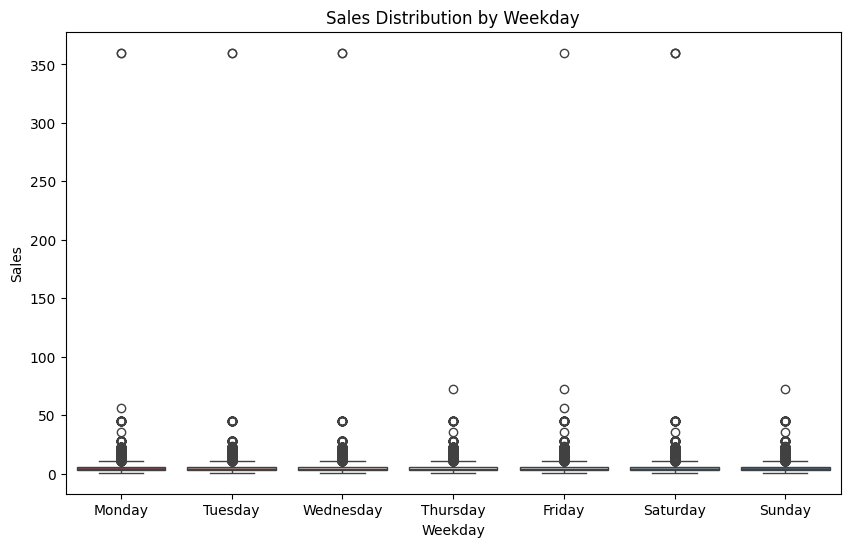

In [46]:
# Boxplot of sales by weekday to visualize distribution and outliers
plt.figure(figsize=(10,6))
sns.boxplot(x='weekday', y='sales', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='RdBu')
plt.title('Sales Distribution by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Sales')
plt.show()
# This boxplot shows the spread and outliers of sales for each weekday.

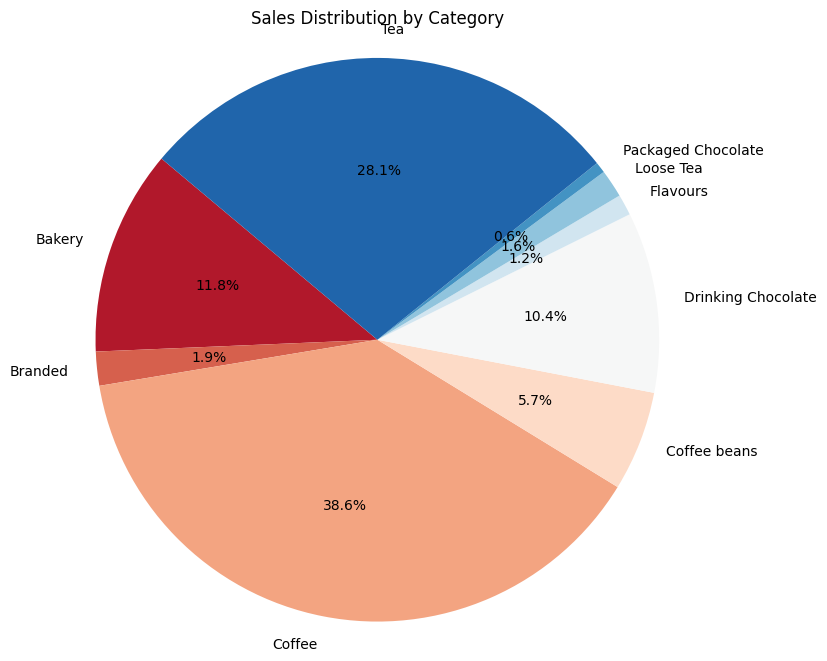

In [47]:
# Pie chart of sales by category for proportional view
category_sales = df.groupby('category')['sales'].sum()
plt.figure(figsize=(8,8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('RdBu', len(category_sales)))
plt.title('Sales Distribution by Category')
plt.axis('equal')
plt.show()
# This pie chart shows the proportion of total sales contributed by each product category.

C:\Users\VIjay Andem\AppData\Local\Temp\ipykernel_20580\4111091194.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quantity', y='product', data=top10_quantity, palette='RdBu')


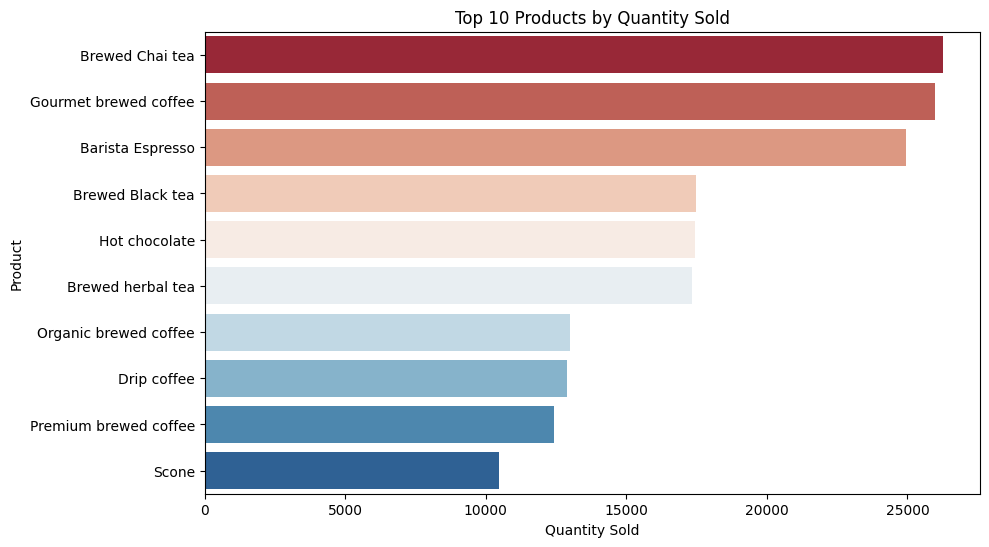

In [48]:
# Top 10 products by quantity sold
product_quantity = df.groupby('product')['quantity'].sum().reset_index()
top10_quantity = product_quantity.sort_values('quantity', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='quantity', y='product', data=top10_quantity, palette='RdBu')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()
# This bar plot shows which products are most popular by quantity, not just revenue.

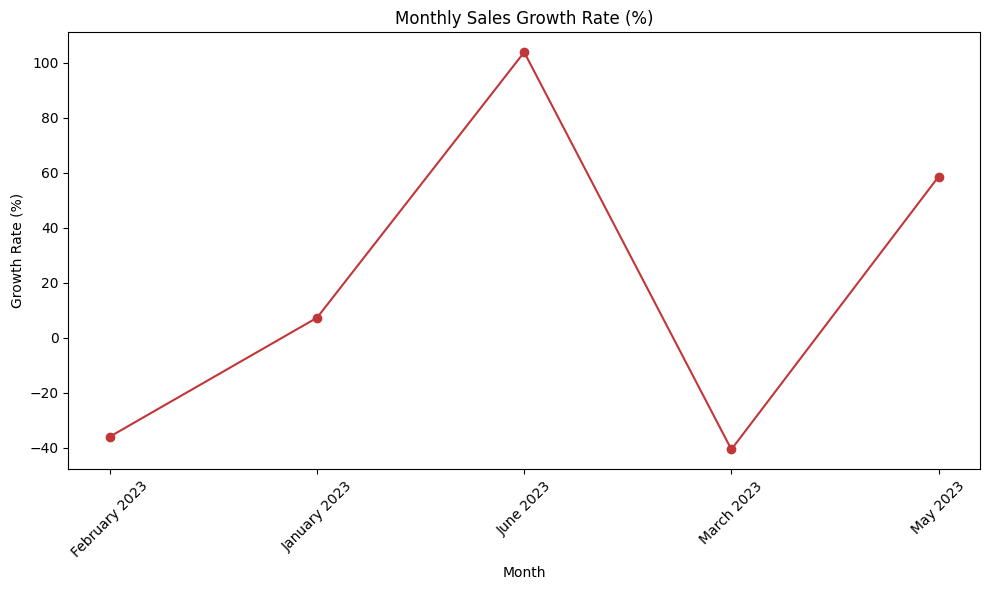

In [49]:
# Monthly sales growth rate
monthly_sales = df.groupby(['year', 'month'])['sales'].sum().reset_index()
monthly_sales['prev_sales'] = monthly_sales['sales'].shift(1)
monthly_sales['growth_rate'] = ((monthly_sales['sales'] - monthly_sales['prev_sales']) / monthly_sales['prev_sales']) * 100
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['month'] + ' ' + monthly_sales['year'].astype(str), monthly_sales['growth_rate'], marker='o')
plt.title('Monthly Sales Growth Rate (%)')
plt.xlabel('Month')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# This line plot shows the percentage change in sales from month to month.

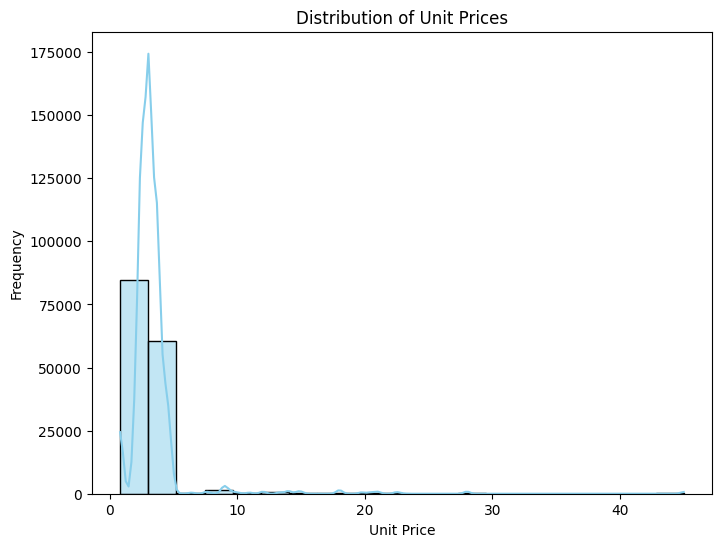

In [50]:
# Distribution of unit prices (histogram)
plt.figure(figsize=(8,6))
sns.histplot(df['unit_price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()
# This histogram shows how unit prices are distributed, highlighting common price points and outliers.

C:\Users\VIjay Andem\AppData\Local\Temp\ipykernel_20580\1985645244.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_of_day', y='sales', data=time_of_day_sales, palette='RdBu')


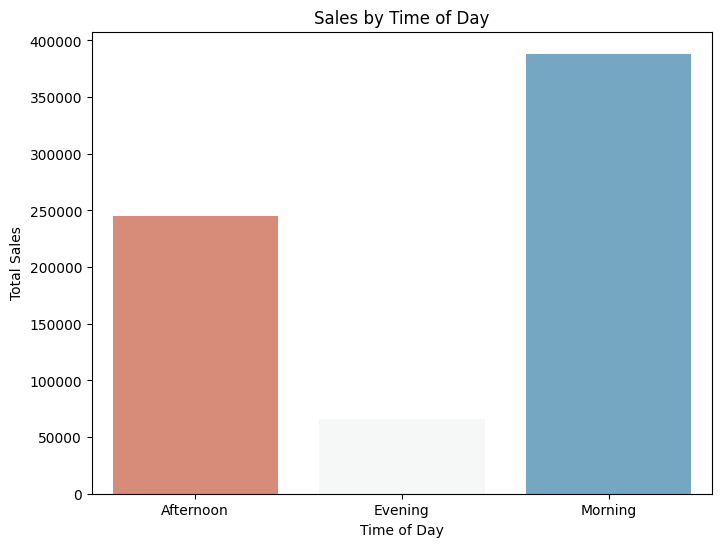

In [51]:
# Sales by time of day (bar plot)
time_of_day_sales = df.groupby('time_of_day')['sales'].sum().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='time_of_day', y='sales', data=time_of_day_sales, palette='RdBu')
plt.title('Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.show()
# This bar plot shows which part of the day generates the most sales.